**SPACY**

**spaCy** is a free, open-source library for advanced Natural Language Processing (NLP) in Python. 

spaCy provides very fast and accurate syntactic analysis and also offers named entity recognition and ready access to word vectors.

![](https://jcharistech.files.wordpress.com/2018/05/nlpwithspacyjcharistech.png?w=840&h=400&crop=1)

Spacy helps us  know more about the text.
What do the **words** mean in context? 
Who is doing what to whom? 
What **companies** and products are mentioned? 
Which **texts** are **similar** to each other?


**SPACY VS NLTK**???

spaCy offers tokenization, sentence boundary detection, POS tagging, NER, syntactic parsing (and chunking, as a subset of this), integrated word vectors, and alignment into the original string.

Please check below link about the advantages of using  spaCy from the **Matthew Honnibal** (Author of SpaCy)

https://www.quora.com/What-are-the-advantages-of-Spacy-vs-NLTK

![](https://qph.fs.quoracdn.net/main-qimg-0a2f519557dead772f74a02aa267f431)

**SPACY FEATURES**

* **Tokenization** Segmenting text into words, punctuations marks etc.
*** Part-of-speech (POS) Tagging** Assigning word types to tokens, like verb or noun.
* ** Dependency Parsing Assigning** syntactic dependency labels, describing the relations between individual tokens, like subject or object.
* **Lemmatization** Assigning the base forms of words. For example, the lemma of "was" is "be", and the lemma of "rats" is "rat".
* **Sentence** **Boundary** **Detection** (SBD) Finding and segmenting individual sentences.
* **Named** **Entity** **Recognition** (NER) Labelling named "real-world" objects, like persons, companies or locations.
* Similarity Comparing words, text spans and documents and how similar they are to each other.
* Text Classification Assigning categories or labels to a whole document, or parts of a document.
* Rule-based Matching Finding sequences of tokens based on their texts and linguistic annotations, similar to regular expressions.
* 1Training Updating and improving a statistical model's predictions.
* Serialization Saving objects to files or byte strings.

Will discuss each spacy features in detail.



[2. Loading Libraries](#2)  
[3. Importing Data](#3)  
[4. spaCy's features ](#4)  
&nbsp; &nbsp;&nbsp; &nbsp; [4.1. LINGUISTIC ANNOTATIONS](#4-1)  
&nbsp; &nbsp;&nbsp; &nbsp; [4.2TOKENIZATION](#4-2)  
&nbsp; &nbsp;&nbsp; &nbsp; [4.3PARTS OF SPEECH TAGS AND DEPENDENCIES](#4-3)  
&nbsp; &nbsp;&nbsp; &nbsp; [4.4NAMED ENTITIES](#4-4)

[5. PipeLines ](#5)  

<a id="2"></a>
## 2.**Loading Libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random

<a id="3"></a>
## 3.**Importing Data and  spacy.load()**

In [ ]:
train = pd.read_csv("../input/train.csv")
random.seed(22)
text = train.text[random.sample(range(1,50),5)]


In [ ]:
train.head()

In [ ]:
train.shape

<a id="3-2"></a>
### 3-2 Install Model and Load using spacy.load()


![](http://)1. Install different models (en_core_web_en,sm,md,lg..etc) using **python -m spacy download modelname**
2. Load it using **spacy.load(name)** Model to load
en_core_web_md -- 	English	-- Vocabulary, syntax, entities, vectors

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
text1 = str(text)
doc = nlp(text1)

<a id="4"></a>
## 4.**spaCy Features**

<a id="4-1"></a>
### 4.1 **LINGUISTIC ANNOTATIONS**


spaCy provides a variety of **linguistic annotations** to give you insights into a text's grammatical structure.
This includes the word types, like the parts of speech, and how the words are related to each other. 

In [ ]:
df = pd.DataFrame()

for i, token in enumerate(doc):
    df.loc[i, 'text'] = token.text
    df.loc[i, 'pos'] = token.pos_
    df.loc[i, 'dep'] = token.dep_

    

In [ ]:
df.head(15)

Text is Split into individual words and annotated.
Confess is a Verb and structure is a Noun

**token.pos_** gives course grained part of speech and **token.dep_**Syntacic dependency relation.

please find the below table for the different other attributes.


**Different Attributes:**

doc	Doc	The parent document.


vocab	Vocab	The vocab object of the parent Doc.
doc	Doc	The parent document.
head	Token	The syntactic parent, or "governor", of this token.

left_edge	Token	The leftmost token of this token's syntactic descendants.
right_edge	Token	The rightmost token of this token's syntactic descendants.

i	int	The index of the token within the parent document.
ent_type	int	Named entity type.

lemma	int	Base form of the token, with no inflectional suffixes.

norm_	unicode	The token's norm, i.e. a normalised form of the token text. Usually set in the language's tokenizer exceptions or norm exceptions.

**pos_**	unicode	Coarse-grained part-of-speech.



**tag_**	unicode	Fine-grained part-of-speech.

dep	int	Syntactic dependency relation.

lang	int	Language of the parent document's vocabulary.

prob	float	Smoothed log probability estimate of token's type.
idx	int	The character offset of the token within the parent document.

**sentiment**	float	A scalar value indicating the positivity or negativity of the token.


<a id="4-2"></a>
### 4.2 **TOKENIZATION**

TOKENIZATION** -** Assigning word types to tokens, like verb or noun.**
During processing, spaCy first tokenizes the text.segments it into words, punctuation .applies rules specific to each language. 

In [ ]:
df1 = pd.DataFrame()
for i,token in enumerate(doc):
    df1.loc[i,'text'] = token.text

In [ ]:
print(df1.head(15))

The raw text is split on whitespace characters. Then, the tokenizer processes the text from left to right. On each substring, it performs two checks:
** **Does the substring match a tokenizer exception rule? 
 Can a prefix, suffix or infix be split off? For example punctuation like commas, periods, hyphens or quotes.****
 
 
 
3      confess
4         that
5      neither
6          the
7    structure
8           of
9       langua
10         ...
11          \n
12          16

please check below example on how spacy does tokenization


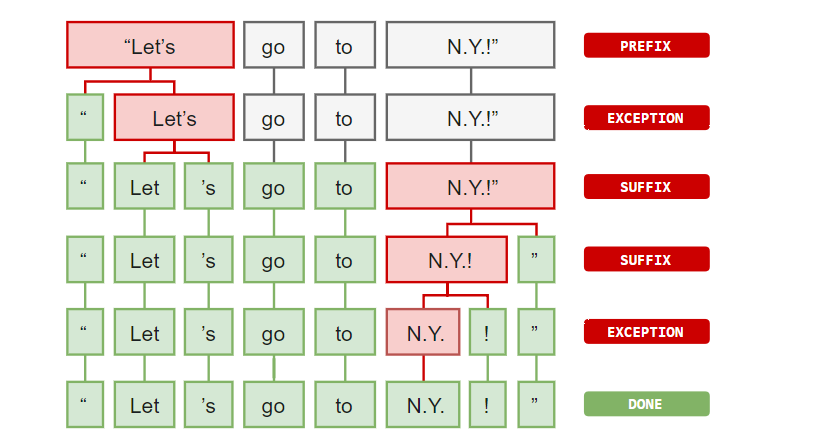

Tokenizer exceptions strongly depend on the specifics of the individual language

<a id="4-3"></a>
### 4.3 PARTS OF SPEECH TAGS AND DEPENDENCIES**

** Assigning word types to tokens, like verb or noun.**
After tokenization, spaCy can parse and tag a given Doc.spaCy  makes a **prediction** of which** tag or label **most likely applies in this context by using statistical techniques.
A model consists of binary data and is produced by showing a system enough examples for it to make predictions that generalise across the language.

[Linguistic annotations] are available as **Token attributes** . spaCy encodes all strings to hash values to reduce memory usage and improve efficiency.

In [ ]:
df3 = pd.DataFrame()
for i,token in enumerate(doc):
    df3.loc[i,'text'] = token.text
    df3.loc[i,'lemma_'] = token.lemma_
    df3.loc[i,'pos_'] = token.pos_
    df3.loc[i,'tag_'] = token.tag_
    df3.loc[i,'dep_'] = token.dep_
    df3.loc[i,'shape_'] = token.shape_
    df3.loc[i,'is_alpha'] = token.is_alpha
    df3.loc[i,'is_stop'] = token.is_stop

In [ ]:
df3.head(15)

In [ ]:
spacy.displacy.render(doc, style='ent',jupyter=True)

In [ ]:
spacy.displacy.render(doc, style='dep',jupyter=True,options = {'compact':60})

 How did spaCy assigned confess as VERB(POS) and I as PRON ?
 
  **morphology**  is the study of words, how they are formed, and their relationship to other words in the same language.It analyzes the structure of words and parts of words, such as stems, root words, prefixes, and suffixes.
  
  spaCy Workflow:
  
1. The tokenizer consults a mapping table TOKENIZER_EXCEPTIONS, which allows sequences of characters to be mapped to multiple tokens. 
2.  The part-of-speech tagger then assigns each token an extended **POS** tag.  part-of-speech (e.g. VERB) and if verb is past tense.
3. Rule-based deterministic **lemmatizer** maps the surface form, to a lemma in light of the previously assigned extended part-of-speech and morphological information.



spaCy uses the terms head and child to describe the words connected by a single arc in the dependency tree. The term **dep** describes the type of syntactic relation that connects the child to the head.

<a id="4-4"></a>
### 4.4**NAMED ENTITIES**

- **Labelling named "real-world" objects, like persons, companies or locations.**

A named entity is a "real-world object" that's assigned a name – for example, a person, a country, a product or a book title. spaCy can recognise various types of named entities in a document.

**Different types of Named Entities**
**PERSON**	People, including fictional.
**NORP**	Nationalities or religious or political groups.
**FAC**	Buildings, airports, highways, bridges, etc.
**ORG**	Companies, agencies, institutions, etc.
**GPE**	Countries, cities, states.
**LOC**	Non-GPE locations, mountain ranges, bodies of water.
**PRODUCT**	Objects, vehicles, foods, etc. (Not services.)
**EVENT**	Named hurricanes, battles, wars, sports events, etc.
**WORK_OF_ART**	Titles of books, songs, etc.
**LAW**	Named documents made into laws.
**LANGUAGE**	Any named language.
**DATE**	Absolute or relative dates or periods.
**TIME**	Times smaller than a day.
**PERCENT**	Percentage, including "%".
**MONEY**	Monetary values, including unit.
**QUANTITY**	Measurements, as of weight or distance.
**ORDINAL**	"first", "second", etc.
**CARDINAL**	Numerals that do not fall under another type.

In [ ]:
df2 = pd.DataFrame()

for i, ent in enumerate(doc):
    df2.loc[i, 'text'] = ent.text
    df2.loc[i, 'pos'] = ent.pos_
    df2.loc[i, 'dep'] = ent.dep_

In [ ]:
df2.head(15)

The dependency visualizer, dep, shows part-of-speech tags and syntactic dependencies.

In [ ]:
df3 = pd.DataFrame()
for i,token in enumerate(doc):
    df3.loc[i,'text'] = token.text
    df3.loc[i,'has_vector'] = token.has_vector
    df3.loc[i,'vector_norm'] = token.vector_norm
    df3.loc[i,'is_oov'] = token.is_oov

In [ ]:
df3.head(15)

<a id="5"></a>
## 5.**Pipelines**

When you call nlp on a text in **spaCy**, 
1.spaCy first tokenizes the text to produce a Doc object. 
2.The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the default models consists of a tagger, a parser and an entity recognizer.
Each pipeline component returns the processed Doc, which is then passed on to the next component

![](http://spacy.io/assets/img/pipeline.svg)

**tokenizer**   Tokenizer                    	Doc	Segment text into tokens.

**tagger**	            Tagger 	Doc[i].tag	Assign part-of-speech tags.

**parser**	DependencyParser 	Doc[i].head, Doc[i].dep, Doc.sents, Doc.noun_chunks	Assign dependency labels


ner	**EntityRecognizer** 	Doc.ents, Doc[i].ent_iob, Doc[i].ent_type	Detect and label named entities.


textcat	**TextCategorizer** 	Doc.cats	Assign document labels.


In [ ]:
for word in doc:
    lexeme = doc.vocab[word.text]
    print(lexeme.text, lexeme.orth, lexeme.shape_, lexeme.prefix_, lexeme.suffix_,
          lexeme.is_alpha, lexeme.is_digit, lexeme.is_title, lexeme.lang_)

**MORE TO COME .STAY TUNED**

References: Spacy documentation - https://spacy.io/usage/examples#section-pipeline